In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from pickle import load
import os

from sklearn.model_selection import train_test_split

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_dat(root_dir,fname):
    
    data_path = os.path.join(root_dir,dataset)
    with open(data_path, 'rb') as handle:
        data = load(handle) #, encoding='latin1'
    data = [data[c - 1] for c in cells]
    
    return data

In [3]:
data_path = '/Users/Torben/Documents/cai-3_dataset/data/'
dataset = 'data.1.train.preprocessed.pck'  # AOD dataset
data = load_dat(data_path,dataset)

In [36]:
no_entries = len(data)
this_entry = data[1]
calcium = this_entry['calcium']
spikes = this_entry['spikes']
# somteimes spikes have 2 somehow
spikes[spikes>1]=1
srate = int(np.floor(this_entry['fps'])) # frames per second I think

In [71]:
def build_offset_features(raw_dat,n_offsets, forward=True, backward=True, verbose=False):
    
    '''
    Builds a feature matrix of imaging data n points away
    '''
    output_mat = raw_dat;
    if forward:
        forward_mat = np.zeros((n_offsets,raw_dat.shape[1]))

        for n in xrange(n_offsets):
            if verbose:
                print 'Offsetting by ' + str(n+1)
            forward_mat[n,:] = np.roll(raw_dat,n)
            
        output_mat=np.vstack([output_mat,forward_mat])

    if backward:
        backward_mat = np.zeros((n_offsets,raw_dat.shape[1]))

        for n in xrange(n_offsets):
            if verbose:
                print 'Offsetting by -' + str(n+1)
            backward_mat[n,:] = np.roll(raw_dat,-1*n)
        
        output_mat=np.vstack([output_mat,backward_mat])

    return output_mat


In [116]:
offset_mat = build_offset_features(calcium,5)
toy_calcium = offset_mat[:,0:50000]
toy_spikes = spikes[0,0:50000]

X_train, X_test, y_train, y_test = train_test_split(toy_calcium.T, toy_spikes.T, test_size=0.2, random_state=0)
print X_train.shape

(40000, 11)


In [68]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train.T)
predictions = clf.predict(X_test)

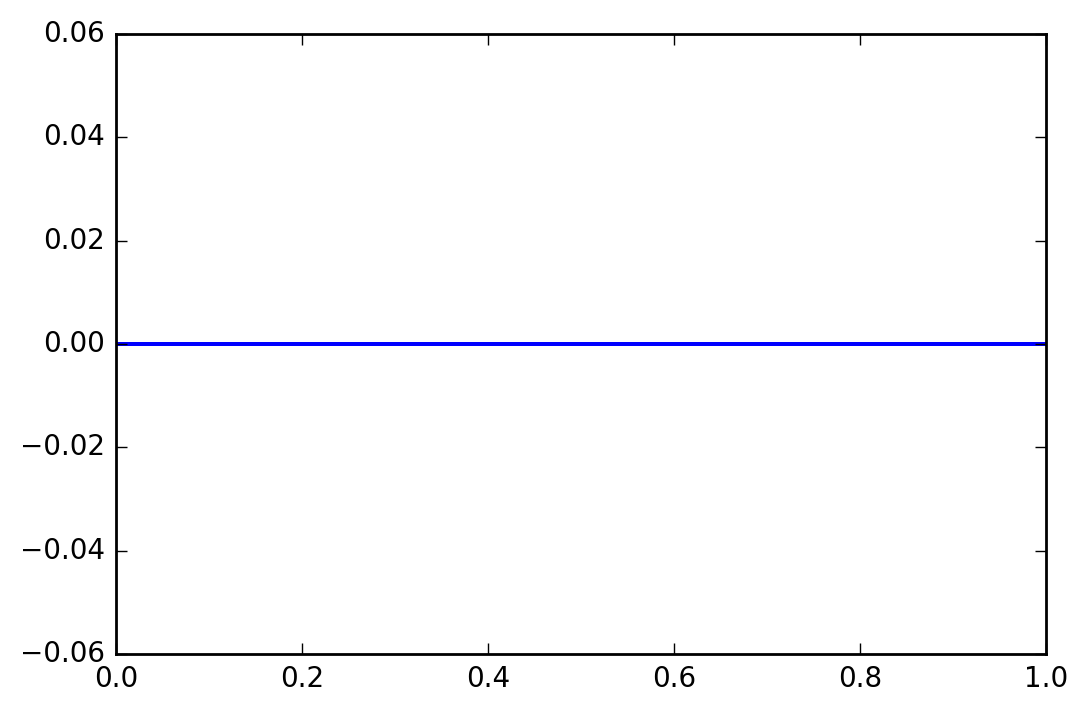

In [72]:
actual_predictions = clf.predict(X_test)
plt.plot(y_test,predictions)

array([[ 1.        , -0.08039664],
       [-0.08039664,  1.        ]])

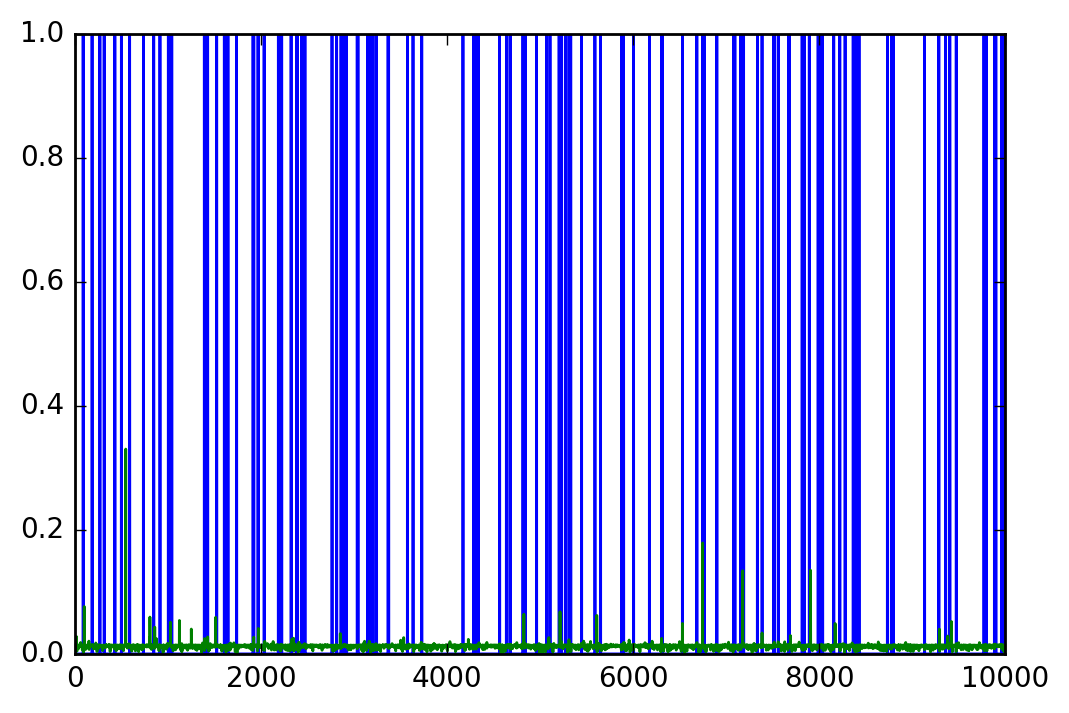

In [82]:
actual_predictions = clf.predict_proba(X_test)
#plt.plot(y_test,actual_predictions[:,1])
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_test)),actual_predictions[:,1])
np.corrcoef(actual_predictions[:,0],y_test)

In [100]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.recurrent import GRU, LSTM
from keras.regularizers import l1, activity_l1, l2, activity_l2,l1l2
from keras.wrappers.scikit_learn import KerasRegressor

import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score

In [117]:
GLM = Sequential()
GLM.add(Dense(1, input_dim=X_train.shape[1], init='uniform', activation='linear'))
GLM.add(Dense(1,activation='softmax'))
GLM.compile(loss='binary_crossentropy', optimizer='adam')

In [118]:
GLM.fit(X_train, y_train,nb_epoch=3);

Epoch 1/3
40000/40000 [==============================] - 0s - loss: 15.7351     
Epoch 2/3
40000/40000 [==============================] - 0s - loss: 15.7351     
Epoch 3/3
40000/40000 [==============================] - 0s - loss: 15.7351     


In [110]:
Yr = GLM.predict(X_train)
Yt = GLM.predict(X_test)
train_accuracy = accuracy_score(y_train,Yr)
print 'training accuracy: ' + str(train_accuracy)
test_accuracy = accuracy_score(y_test,Yt)
print 'testing accuracy: ' + str(test_accuracy)

train_precision = precision_score(y_train,Yr)
print 'training precision: ' + str(train_precision)
test_precision = precision_score(y_test,Yt)
print 'testing precision: ' + str(test_precision)

training accuracy: 0.013
testing accuracy: 0.0131
training precision: 0.013
testing precision: 0.0131


In [127]:
np.corrcoef(X_train[:,6],y_train)

array([[ 1.        ,  0.12448435],
       [ 0.12448435,  1.        ]])

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

In [ ]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [97]:
GLM.evaluate??